In [30]:
#impor the libabries 
import numpy as np
import pandas as pd
import yfinance as yf
import pandas_datareader as pdr
import seaborn as sns
from datetime import datetime
from scipy.optimize import minimize


In [2]:
# Define the stocks and the index
stocks = ['DFS', 'GIS', 'GILD', '^GSPC']

# Define the date range
start_date = '2014-01-01'
end_date = '2024-01-01'

# Download the historical data
data = yf.download(stocks, start=start_date, end=end_date)['Adj Close']

# Fetch 3-month Treasury bill data from FRED
risk_free_rate_data = pdr.get_data_fred('TB3MS', start='2014-01-01', end='2024-01-01')
# Rename the column to 'Risk-Free Rate'
risk_free_rate_data.columns = ['Risk-Free Rate']


[*********************100%%**********************]  4 of 4 completed


In [3]:
data.head()

Ticker,DFS,GILD,GIS,^GSPC
Date,,,,
2014-01-02,44.361240,55.341145,34.761028,1831.979980
2014-01-03,44.128841,54.686272,34.662506,1831.369995
2014-01-06,43.559910,53.891579,34.718811,1826.770020
2014-01-07,43.856377,53.553097,35.077667,1837.880005
2014-01-08,43.880428,54.053467,34.439526,1837.489990


### Table 1 

In [4]:
# Calculate the daily returns
returns = data.pct_change()

# Calculate the annual average return
average_returns = returns.mean() * 252

# Calculate the standard deviation
std_dev = returns.std() * np.sqrt(252)

# Define the risk free rate
risk_free_rate = risk_free_rate_data.mean()[0] # replace with the actual rate

# Calculate the Sharpe ratio
sharpe_ratio = (average_returns - risk_free_rate) / std_dev

# Calculate the correlation coefficient with the S&P500
correlation = returns.corrwith(returns['^GSPC'])

t1=pd.DataFrame({'Average Return': average_returns,
              'Std': std_dev,
              'Sharpe_Ratio': sharpe_ratio,
              'Correlaratio_s&p500': correlation})
t1


,Average Return,Std,Sharpe_Ratio,Correlaratio_s&p500
Ticker,,,,
DFS,0.163083,0.372408,-3.095262,0.692700
GILD,0.072631,0.266081,-4.672092,0.443975
GIS,0.082557,0.206414,-5.974535,0.347608
^GSPC,0.111697,0.177378,-6.788243,1.000000


In [5]:
returns.corr()

Ticker,DFS,GILD,GIS,^GSPC
Ticker,,,,
DFS,1.000000,0.240461,0.131604,0.692700
GILD,0.240461,1.000000,0.261650,0.443975
GIS,0.131604,0.261650,1.000000,0.347608
^GSPC,0.692700,0.443975,0.347608,1.000000


In [29]:
#Correlation matrix 
plt.figure(figsize=(10, 7))
sns.heatmap(returns.corr(), annot=True)

plt.show()

NameError: name 'sn' is not defined

<Figure size 1000x700 with 0 Axes>

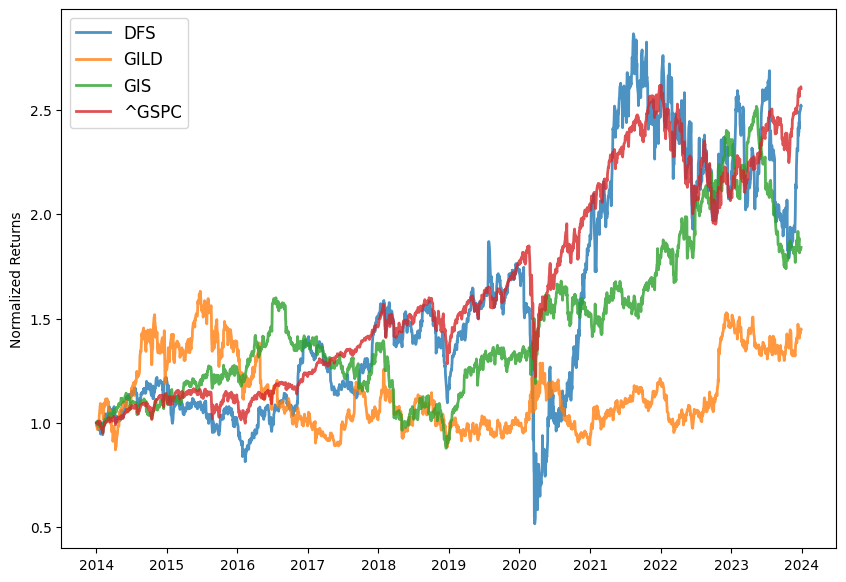

In [6]:
import matplotlib.pyplot as plt

# Calculate the normalized returns
normalized_returns = (data / data.iloc[0])

plt.figure(figsize=(8, 6))
for i in normalized_returns.columns.values:
    plt.plot(normalized_returns.index, normalized_returns[i], lw=2, alpha=0.8,label=i)
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Normalized Returns')
plt.show()

# Part 2

In [7]:
# Load the data
esg_data = pd.read_excel('ESG Data 2023 Selection 4 copy.xlsx')
ticker= ['DFS','GILD','GIS','^GSPC']
esg_data= esg_data[esg_data['ticker'].isin(ticker)]
esg_data= esg_data[['isin', 'year', 'ticker','fieldname',
                    'valuedate','value','valuescore']]


climate_data = pd.read_excel('firmyear_score_2022Q4_Version_2023_Oct_31 copy.xlsx')
climate_data= climate_data[['isin', 'year','cc_expo_ew', 'op_expo_ew','rg_expo_ew','ph_expo_ew']]

# Merge the data 
merged_data = pd.merge(esg_data, climate_data, on=['isin', 'year'], how='inner' )

In [8]:
esg_data.head()

,isin,year,ticker,fieldname,valuedate,value,valuescore
80336,US2547091080,2022,DFS,ESGScore,2024-02-03,B,0.598440
80337,US2547091080,2022,DFS,ESGCombinedScore,2024-02-03,C,0.366407
80338,US2547091080,2022,DFS,ESGCControversiesScore,2024-02-03,D,0.134375
80339,US2547091080,2022,DFS,EnvironmentPillarScore,2024-02-03,D+,0.219566
80340,US2547091080,2022,DFS,GovernancePillarScore,2024-02-03,A-,0.761439


In [9]:
climate_data.head()

,isin,year,cc_expo_ew,op_expo_ew,rg_expo_ew,ph_expo_ew
0,AEA002001013,2016,0.000322,0.000322,0.0,0.0
1,AEA002001013,2017,0.000221,0.000000,0.0,0.0
2,AEA002001013,2018,0.000093,0.000000,0.0,0.0
3,AEA002001013,2019,0.000166,0.000000,0.0,0.0
4,AEA002001013,2020,0.000655,0.000289,0.0,0.0


In [10]:
merged_data.head()

,isin,year,ticker,fieldname,valuedate,value,valuescore,cc_expo_ew,op_expo_ew,rg_expo_ew,ph_expo_ew
0,US2547091080,2022,DFS,ESGScore,2024-02-03,B,0.598440,0.000351,0.0,0.000174,0.0
1,US2547091080,2022,DFS,ESGCombinedScore,2024-02-03,C,0.366407,0.000351,0.0,0.000174,0.0
2,US2547091080,2022,DFS,ESGCControversiesScore,2024-02-03,D,0.134375,0.000351,0.0,0.000174,0.0
3,US2547091080,2022,DFS,EnvironmentPillarScore,2024-02-03,D+,0.219566,0.000351,0.0,0.000174,0.0
4,US2547091080,2022,DFS,GovernancePillarScore,2024-02-03,A-,0.761439,0.000351,0.0,0.000174,0.0


### Table 2 part A

In [11]:
filts= ['ESGCombinedScore',
    'ESGCControversiesScore',
'ESGScore',
'EnvironmentPillarScore',
'GovernancePillarScore',
'SocialPillarScore',
'IndustryverageESGscore']

filt_merge= merged_data[merged_data['fieldname'].isin(filts)]
df=filt_merge.groupby(['ticker', 'fieldname'])['valuescore'].mean().reset_index()
df=df.pivot(index='ticker', columns='fieldname', values='valuescore')
df

fieldname,ESGCControversiesScore,ESGCombinedScore,ESGScore,EnvironmentPillarScore,GovernancePillarScore,SocialPillarScore
ticker,,,,,,
DFS,0.567187,0.482991,0.599007,0.351183,0.715949,0.623019
GILD,0.349315,0.584598,0.819880,0.709395,0.824450,0.871038
GIS,0.287671,0.538478,0.789285,0.881148,0.449553,0.927429


In [12]:
esg_score=filt_merge.groupby(['ticker', 'fieldname'])['valuescore'].mean().groupby(['ticker']).mean()
esg_score

ticker
DFS     0.556556
GILD    0.693113
GIS     0.645594
Name: valuescore, dtype: float64

### Table 2 part b

In [13]:
melt_data= merged_data[['isin','ticker',
                       'cc_expo_ew','op_expo_ew',
                        'rg_expo_ew','ph_expo_ew']]	
melt_data= pd.melt(melt_data, id_vars='ticker', value_vars=['cc_expo_ew',
                                               'op_expo_ew',
                                               'rg_expo_ew',
                                               'ph_expo_ew'])
df2=melt_data.groupby(['ticker', 'variable'])['value'].mean().reset_index().pivot(index='ticker', columns='variable', values='value')
df2

variable,cc_expo_ew,op_expo_ew,ph_expo_ew,rg_expo_ew
ticker,,,,
DFS,0.000377,0.000084,0.0,0.000162
GILD,0.000127,0.000000,0.0,0.000000
GIS,0.000322,0.000000,0.0,0.000151


# Part 3

In [14]:
# Calculate the annualized returns and the covariance matrix
data.drop(['^GSPC'], axis=1, inplace=True)
# returns = data.pct_change().dropna()
# annual_returns = returns.mean() * 252
# var_cov_matrix = returns.cov() * 252

## Table 3

In [15]:

# Calculate the annualized returns and the covariance matrix
returns = data.pct_change().dropna()
r= returns.mean() * 252
covar= returns.cov() * 252

In [16]:
covar

Ticker,DFS,GILD,GIS
Ticker,,,
DFS,0.138688,0.023827,0.010116
GILD,0.023827,0.070799,0.014371
GIS,0.010116,0.014371,0.042607


In [17]:
def ret(r,w):
    return r.dot(w)
# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar)))
def sharpe (ret,vol):
    return ret/vol

In [18]:

from scipy.optimize import minimize, LinearConstraint, Bounds

num_assets = data.shape[1]

# All weights must be between 0 and 1, so set 0 and 1 as the boundaries.
bounds = Bounds(0, 1)

# Set the constraint that the sum of weights equals 1.
constraint_matrix = np.ones((1, num_assets))
linear_constraint = LinearConstraint(constraint_matrix, [1], [1])

# Find a portfolio with the minimum risk.
# Create x0, the first guess at the values of each stock's weight.
initial_weights = np.ones(num_assets) / num_assets

# Define a function to calculate portfolio volatility (risk)
def portfolio_volatility(weights):
    return np.sqrt(np.dot(weights, np.dot(weights, covar)))

# Minimize the risk function using the 'trust-constr' method with linear constraint and bounds.
res = minimize(portfolio_volatility, initial_weights, method='trust-constr', constraints=linear_constraint, bounds=bounds)

# These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

# Set print options to show weights and risk with 2 decimal places
np.set_printoptions(suppress=True, precision=2)

# Print the optimal weights and corresponding return and risk
print("Optimal Weights:")
print(w_min)
print("Return: %.2f%%" % (ret(r, w_min) * 100), "Risk: %.3f" % portfolio_volatility(w_min))

Optimal Weights:
[0.13 0.27 0.6 ]
Return: 9.05% Risk: 0.175


In [19]:
#sharpe ration
sharpe(ret(r, w_min), portfolio_volatility(w_min) )

0.5161795854607286

In [20]:
# Create x0, the first guess at the values of each stock's weight.
initial_weights = np.ones(num_assets) / num_assets

# Define the function to calculate the Sharpe ratio (1/volatility)
def sharpe_ratio(weights):
    portfolio_volatility = np.sqrt(np.dot(weights, np.dot(weights, covar)))
    portfolio_return = np.dot(r, weights)
    return -portfolio_return / portfolio_volatility  # negative value for minimization

# Minimize the negative Sharpe ratio (to maximize Sharpe ratio) using 'trust-constr' method with constraints and bounds.
res_sharpe = minimize(sharpe_ratio, initial_weights, method='trust-constr', constraints=linear_constraint, bounds=bounds)

# These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x

# Set print options to show weights, return, and risk with 2 decimal places
np.set_printoptions(suppress=True, precision=2)

# Print the optimal weights and corresponding return and risk
print("Optimal Weights (Highest Sharpe Ratio):")
print(w_sharpe)
print("Return: %.2f%%" % (np.dot(r, w_sharpe) * 100), "Risk: %.3f" % np.sqrt(np.dot(w_sharpe, np.dot(w_sharpe, covar))))

Optimal Weights (Highest Sharpe Ratio):
[0.34 0.13 0.54]
Return: 10.86% Risk: 0.192


In [21]:
#sharpe ratio
sharpe(np.dot(r, w_sharpe),np.sqrt(np.dot(w_sharpe, np.dot(w_sharpe, covar))))

0.5653754541176691

In [22]:

covariance_min_var_efficient = np.dot(w_min.T, np.dot(covar, w_sharpe))
covariance_min_var_efficient

0.03074987491090183

## Table 5

In [23]:
def calculate_portfolio_variance(weights, cov_matrix):
    portfolio_variance = np.dot(weights.T, np.dot(cov_matrix, weights))
    return portfolio_variance

In [24]:
# 7. Calculate the portfolio SD and return of a portfolio of the min var weights
weights_combinations = np.linspace(0, 1, 11)
portfolio_returns = []
portfolio_std = []
portfolio_esg_score=[]
portfolio_sharpe=[]
for w in weights_combinations:
    portfolio_returns.append(w * r @ w_min + (1 - w) *r@ w_sharpe)  # Missing operator fixed
    vol= np.sqrt(w**2 * calculate_portfolio_variance(w_min, covar) + (1-w)**2 * calculate_portfolio_variance(w_sharpe,covar))
    portfolio_std.append(vol)  # Function call added
    portfolio_esg_score.append(w * esg_score @ w_min + (1 - w) *esg_score@ w_sharpe)
    portfolio_sharpe.append(sharpe((w * r @ w_min + (1 - w) *r@ w_sharpe),vol))
    
    
    
portfolio_table = pd.DataFrame({
  'Weights': weights_combinations,
    'Portfolio_Std': portfolio_std,
  'Portfolio_Return': portfolio_returns,
    'Portfolio_Sharpe': portfolio_sharpe,
  
    'Portfolio_Esg_Score': portfolio_esg_score
    
})

round(portfolio_table,4)

,Weights,Portfolio_Std,Portfolio_Return,Portfolio_Sharpe,Portfolio_Esg_Score
0,0.0,0.1921,0.1086,0.5654,0.6214
1,0.1,0.1737,0.1068,0.6146,0.6239
2,0.2,0.1576,0.1050,0.6661,0.6264
3,0.3,0.1444,0.1032,0.7146,0.6290
4,0.4,0.1349,0.1014,0.7513,0.6315
5,0.5,0.1300,0.0996,0.7656,0.6340
6,0.6,0.1303,0.0977,0.7503,0.6365
7,0.7,0.1356,0.0959,0.7075,0.6390
8,0.8,0.1454,0.0941,0.6472,0.6416
9,0.9,0.1590,0.0923,0.5807,0.6441


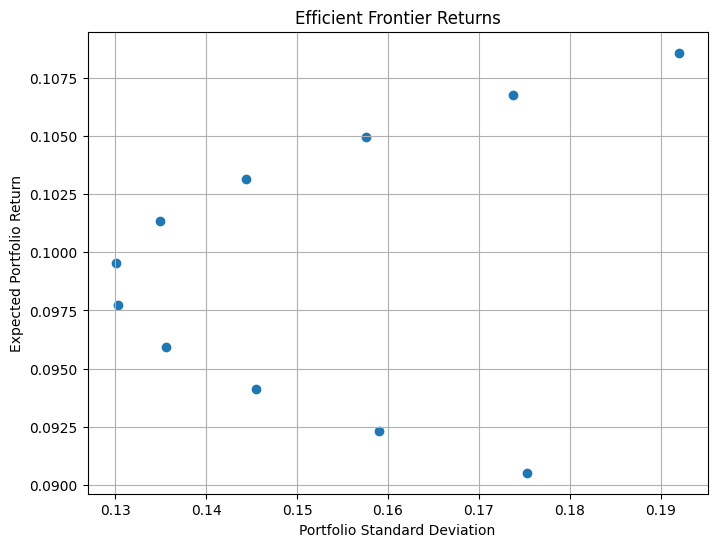

In [25]:
# Plotting the portfolio frontier
plt.figure(figsize=(8, 6))
plt.scatter(portfolio_table['Portfolio_Std'], portfolio_table['Portfolio_Return'])
plt.title('Efficient Frontier Returns')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Expected Portfolio Return')
plt.grid(True)
plt.show()

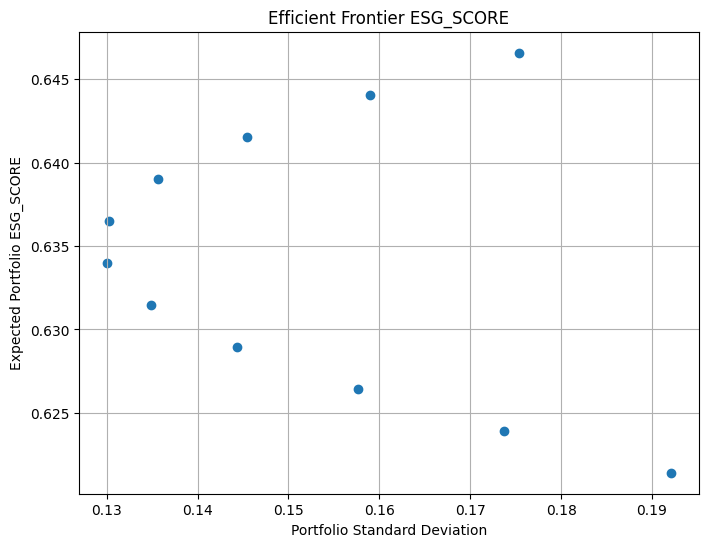

In [26]:
# Plotting the portfolio frontier
plt.figure(figsize=(8, 6))
plt.scatter(portfolio_table['Portfolio_Std'], portfolio_table['Portfolio_Esg_Score'])
plt.title('Efficient Frontier ESG_SCORE')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Expected Portfolio ESG_SCORE')
plt.grid(True)
plt.show()